# Genetic based DecisionTree
**date  :** July 1, 2023
**Author:** Mohammad reza abbasniya

#### Read dataset

In [1]:
import numpy as np

def get_data(path: str):
    data = []
    with open(path) as file:
        n = int(file.readline())
        line = file.readline()
        while line != '':
            d = line.split(' ')
            assert len(d) == n + 1, f'each line of file must contain {n + 1} integers'
            data.append([int(d[i]) for i in range(n + 1)])
            line = file.readline()

    return np.array(data)

data = get_data('inputs/test05.txt')
X = data[:, :-1]
y = data[:, -1]

print(f'X : {X.shape}')
print(f'y : {y.shape}')

X : (500, 2)
y : (500,)


#### Train test split

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(f'X_train : {X_train.shape}')
print(f'X_test  : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test  : {y_test.shape}')

X_train : (335, 2)
X_test  : (165, 2)
y_train : (335,)
y_test  : (165,)


#### Train GeneticDecisionTree on training set

In [3]:
from genetic_decision_tree import GeneticDecisionTreeClassifier

gdtc = GeneticDecisionTreeClassifier(max_depth=6,
                                     random_state=5,
                                     genetic_max_iterations=10,
                                     genetic_k=8)
gdtc.fit(X_train, y_train)

#### Predict test set

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = gdtc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}% \n')
print(f'Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.33% 

Confusion matrix:
[[71  2  0]
 [ 2 16  0]
 [ 7  0 67]]


<hr>
<hr>

#### Visulization using graphviz
more info on: https://graphviz.readthedocs.io/en/stable/manual.html

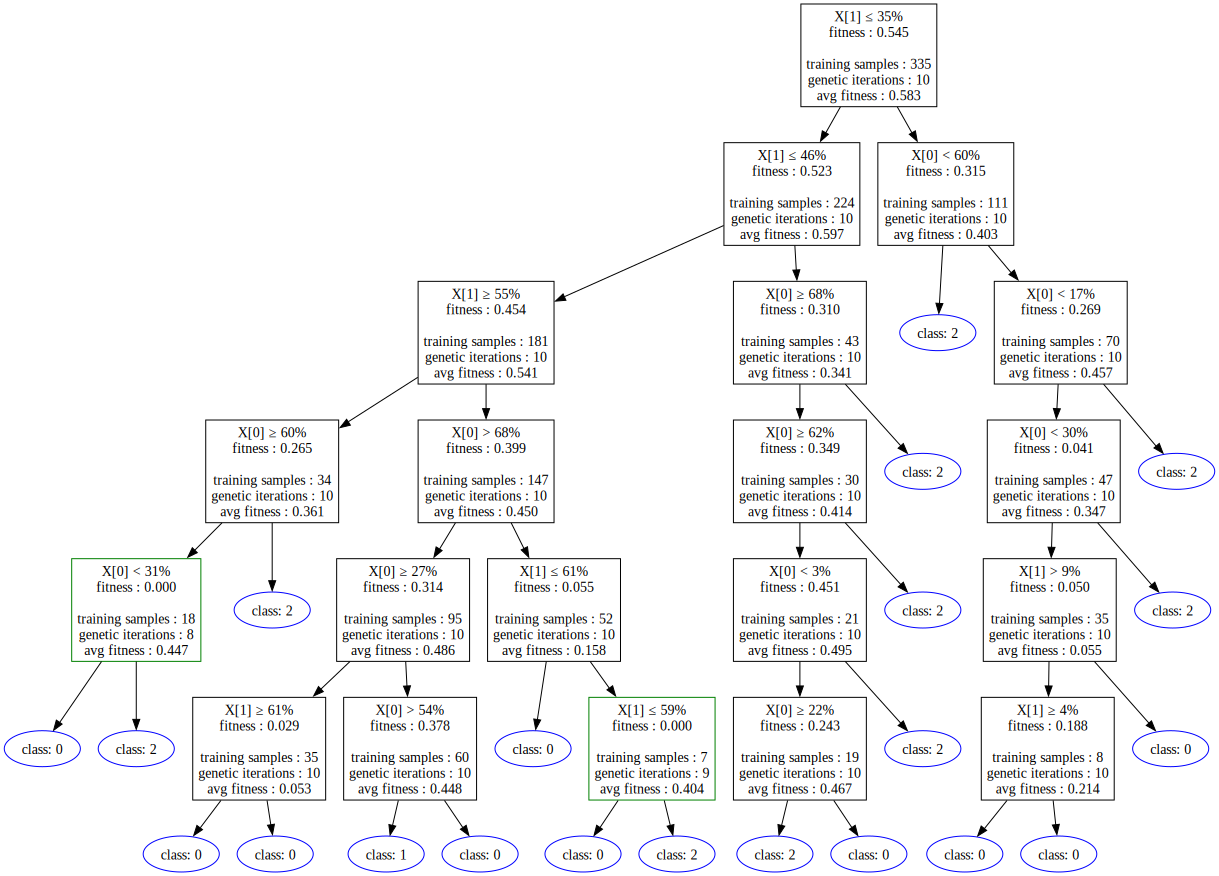

In [5]:
import graphviz

char_opr = ['<', '>', '≤', '≥']
def preorder_traversal(root, dot):
    if root:
        if root.type == 1:
            dot.node(name=str(id(root)), label=f'class: {root.prediction}', color='blue')
        else:
            chromo = root.chromo
            label = f'X[{chromo.feature}] {char_opr[chromo.opr]} {chromo.percent}%\n'
            label += f'fitness : {chromo.fitness:.3f}\n\n'
            label += f'training samples : {len(root.indices)}\n'
            label += f'genetic iterations : {root.genetic_summery[0]}\n'
            label += f'avg fitness : {root.genetic_summery[1]:.3f}\n'
            color = 'green' if chromo.fitness==0 else None
            dot.node(name=str(id(root)), label=label, shape='box', color=color)
        
        if root.left is not None:
            dot.edge(str(id(root)), str(id(root.left)))
        if root.right is not None:
            dot.edge(str(id(root)), str(id(root.right)))
        preorder_traversal(root.left, dot)
        preorder_traversal(root.right, dot)
        
dot_preorder = graphviz.Digraph(comment='Preorder Traversal')
preorder_traversal(gdtc.head, dot_preorder)
dot_preorder.render('outputs/render', format='png')
dot_preorder